In [1]:
# necessary libraries
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers

from keras.models import Model, Sequential
from keras import layers

import tensorflow as tf

In [2]:
# no need to execute this for me , i already execute it and i have folders of train and valitons sets
import os
import shutil
import pandas as pd
import random

# /kaggle/input/butterfly-image-classification/train/Image_4378.jpg'

# Read the CSV file (assuming the columns are named "filename" and "label" by default)
csv_file_path = "C:/Users/MaestroCom/CNN/Training_set.csv"
data = pd.read_csv(csv_file_path)

# Creating train and validation directories
root_directory = "C:/Users/MaestroCom/CNN"  # Replace with your root directory name

image_dir="C:/Users/MaestroCom/CNN/train" 

train_directory = os.path.join(root_directory, "train")
val_directory = os.path.join(root_directory, "validation")

os.makedirs(train_directory, exist_ok=True)
os.makedirs(val_directory, exist_ok=True)

# Creating label directories
labels = data["label"].value_counts().index


for label in labels:
    label_train_directory = os.path.join(train_directory, label)
    label_val_directory = os.path.join(val_directory, label)
    os.makedirs(label_train_directory, exist_ok=True)
    os.makedirs(label_val_directory, exist_ok=True)

# Shuffle the data
data = data.sample(frac=1).reset_index(drop=True)
# Split the data into 70% train and 30% validation
val_data_count = int(len(data) * 0.3)
validation_data = data[:val_data_count]
train_data = data[val_data_count:]


# Copy train data
for index, row in train_data.iterrows():

    # file name 
    file_name = row['filename']
    # label name
    label = row["label"]

    # images folder , all images are in here  
    source_path = os.path.join(image_dir,file_name) #
    # new destination
    destination_directory = os.path.join(train_directory, label)
    # copy files
    shutil.copy(source_path, destination_directory)
   
    
# Copy validation data
for index, row in validation_data.iterrows():
 
    file_name = row['filename']
    label = row['label']
    
    source_path = os.path.join(image_dir, file_name)
    destination_directory = os.path.join(val_directory, label)
    shutil.copy(source_path, destination_directory)

In [3]:
#C:/Users/MaestroCom/proyek kelas work
#os.listdir("C:/Users/MaestroCom/proyek kelas work/train/POPINJAY")[:5]
os.listdir("C:/Users/MaestroCom/CNN/train/POPINJAY")[:5]

['Image_1029.jpg',
 'Image_1199.jpg',
 'Image_1328.jpg',
 'Image_1361.jpg',
 'Image_1388.jpg']

In [4]:
os.listdir("C:/Users/MaestroCom/CNN/validation/POPINJAY")[:5]

['Image_1029.jpg',
 'Image_1199.jpg',
 'Image_1328.jpg',
 'Image_1361.jpg',
 'Image_1388.jpg']

In [5]:
#directories
training_dir="C:/Users/MaestroCom/CNN/train"
validation_dir="C:/Users/MaestroCom/CNN/validation"

In [6]:
import os

# directories
train_dir = training_dir
validation_dir = validation_dir

# calculate distribution of classes for train
train_class_counts = {}
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        train_class_counts[class_folder] = num_images

# calculate distribution of classes for valdiation
validation_class_counts = {}
for class_folder in os.listdir(validation_dir):
    class_path = os.path.join(validation_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        validation_class_counts[class_folder] = num_images

print("Training set Distribution:")
print(train_class_counts)

print("Validation set Distribution:")
print(validation_class_counts)


Training set Distribution:
{'ADONIS': 88, 'AFRICAN GIANT SWALLOWTAIL': 75, 'AMERICAN SNOOT': 74, 'AN 88': 85, 'APPOLLO': 90, 'ATALA': 100, 'BANDED ORANGE HELICONIAN': 97, 'BANDED PEACOCK': 83, 'BECKERS WHITE': 81, 'BLACK HAIRSTREAK': 85, 'BLUE MORPHO': 75, 'BLUE SPOTTED CROW': 86, 'BROWN SIPROETA': 99, 'CABBAGE WHITE': 90, 'CAIRNS BIRDWING': 83, 'CHECQUERED SKIPPER': 95, 'CHESTNUT': 85, 'CLEOPATRA': 93, 'CLODIUS PARNASSIAN': 87, 'CLOUDED SULPHUR': 92, 'COMMON BANDED AWL': 87, 'COMMON WOOD-NYMPH': 90, 'COPPER TAIL': 94, 'CRECENT': 97, 'CRIMSON PATCH': 72, 'DANAID EGGFLY': 94, 'EASTERN COMA': 93, 'EASTERN DAPPLE WHITE': 92, 'EASTERN PINE ELFIN': 95, 'ELBOWED PIERROT': 82, 'GOLD BANDED': 73, 'GREAT EGGFLY': 78, 'GREAT JAY': 94, 'GREEN CELLED CATTLEHEART': 88, 'GREY HAIRSTREAK': 86, 'INDRA SWALLOW': 81, 'IPHICLUS SISTER': 95, 'JULIA': 81, 'LARGE MARBLE': 81, 'MALACHITE': 73, 'MANGROVE SKIPPER': 87, 'MESTRA': 86, 'METALMARK': 76, 'MILBERTS TORTOISESHELL': 96, 'MONARCH': 90, 'MOURNING CLOAK'

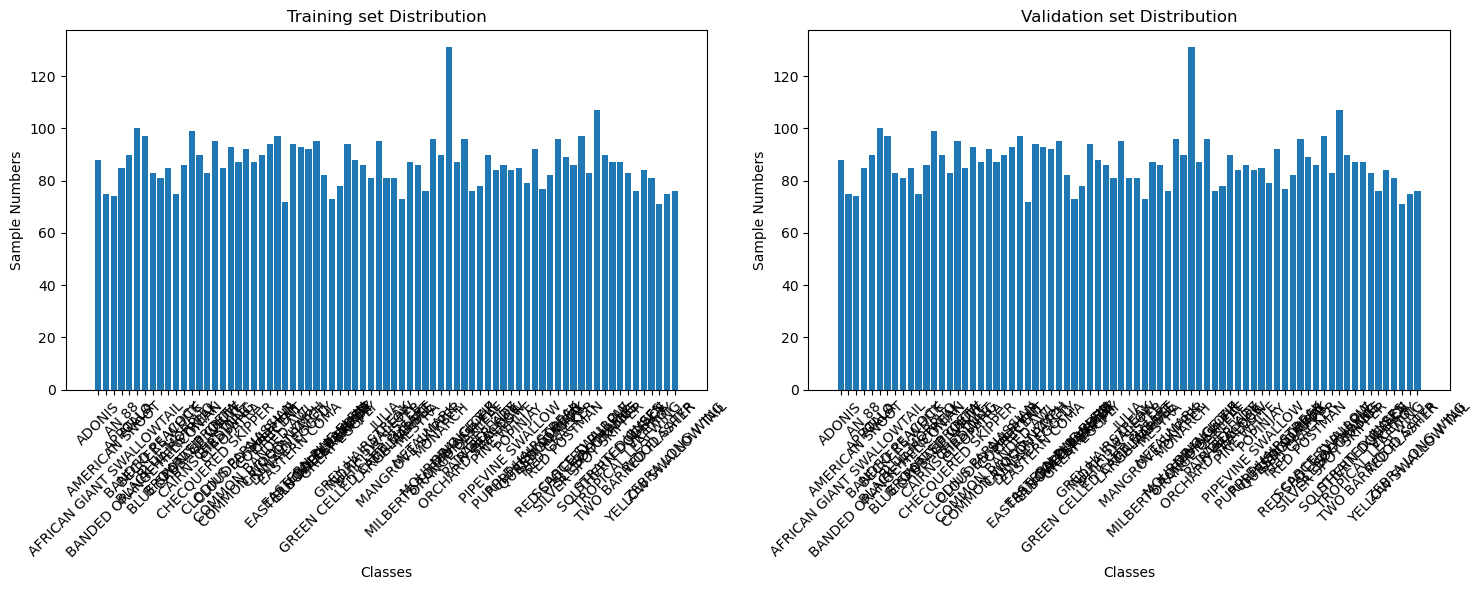

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.title('Training set Distribution')
plt.xlabel('Classes')
plt.ylabel('Sample Numbers')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(validation_class_counts.keys(), validation_class_counts.values())
plt.title('Validation set Distribution')
plt.xlabel('Classes')
plt.ylabel('Sample Numbers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [8]:
# use this function for preparing data  
def prep_data(augmented,batch_size=16):      # if you want to augmented dat set use it like this : prep_data(True)
    if augmented:                            # default batch_size is 16 , you can change it 
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)
    
        validation_datagen = ImageDataGenerator(rescale=1./255)    

    else:
        train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
        validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # training set
    train_set = train_datagen.flow_from_directory(
        training_dir,
        target_size=(180, 180),  # The dimensions to which all images found will be resized
        batch_size=batch_size,# 32  default
        class_mode="sparse") # you can change this to onehotEncoded format or another format
         
    
    # validation set
    validation_set = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(180, 180),
        batch_size=batch_size,  # 32 default
        class_mode="sparse")
             
    return train_set , validation_set

In [9]:
# visulization function for Models
def visualize(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    axs[0].plot(epochs, acc, 'r', label='Training acc')
    axs[0].plot(epochs, val_acc, 'b', label='Validation acc')
    axs[0].set_title('Training and validation accuracy')
    axs[0].legend()
    axs[0].grid(True)
    
    axs[1].plot(epochs, loss, 'r', label='Training loss')
    axs[1].plot(epochs, val_loss, 'b', label='Validation loss')
    axs[1].set_title('Training and validation loss')
    axs[1].legend()
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()

In [10]:
# not augmented dataset
#straight_train_set,validation_set=prep_data(False)

#images,labels=straight_train_set.next()

#class_names = straight_train_set.class_indices
#class_names = {v: k for k, v in class_names.items()}

In [11]:
# not augmented dataset
straight_train_set, validation_set = prep_data(False)

# Iterate over the batches of images and labels
for images, labels in straight_train_set:
    # Process the batch
    # ...
    break  # exit the loop after the first batch

class_names = straight_train_set.class_indices
class_names = {v: k for k, v in class_names.items()}

Found 6499 images belonging to 75 classes.
Found 6498 images belonging to 75 classes.


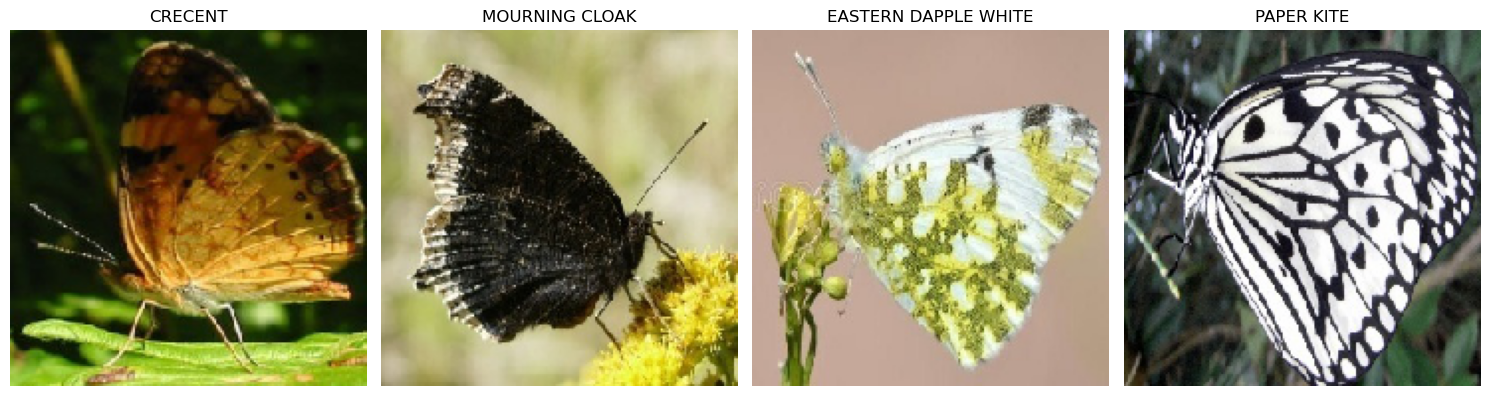

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    axes[i].imshow(images[i]) 
    label_index = int(labels[i])
    class_name = class_names[label_index]
    axes[i].set_title(f"{class_name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [13]:
# augmented dataset
#augmented_train_set,validation_set=prep_data(True)
#images,labels=augmented_train_set.next()

#class_names = augmented_train_set.class_indices
#class_names = {v: k for k, v in class_names.items()}

In [14]:
# augmented dataset
augmented_train_set, validation_set = prep_data(True)

# Get the batch size
batch_size = augmented_train_set.batch_size

# Iterate over the batches of images and labels
for i in range(augmented_train_set.samples // batch_size):
    images, labels = next(iter(augmented_train_set))
    # Process the batch
    # ...
    break  # exit the loop after the first batch

class_names = augmented_train_set.class_indices
class_names = {v: k for k, v in class_names.items()}

Found 6499 images belonging to 75 classes.
Found 6498 images belonging to 75 classes.


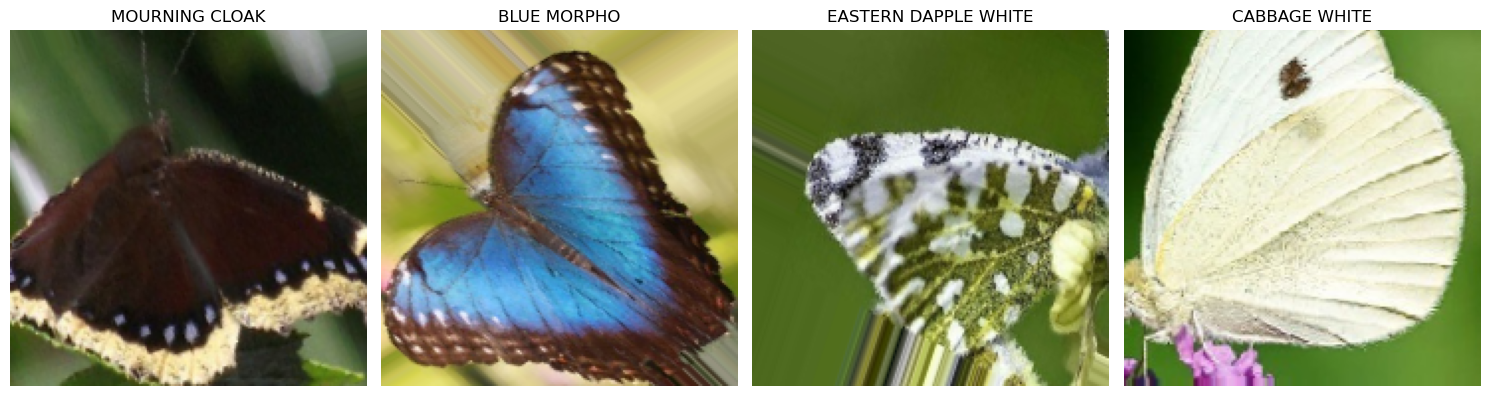

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    axes[i].imshow(images[i]) 
    label_index = int(labels[i])
    class_name = class_names[label_index]
    axes[i].set_title(f"{class_name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

#### cnn model 1_!

In [16]:
train_set,validation_set=prep_data(True)

Found 6499 images belonging to 75 classes.
Found 6498 images belonging to 75 classes.


In [17]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(75 , activation='softmax'))

model.summary()

C:\Users\MaestroCom\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75)             │         9,675 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,015,051 (42.02 MB)

 Trainable params: 11,015,051 (42.02 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [19]:
#import tensorflow as tf

# Define the model architecture
#model = tf.keras.models.Sequential([
    # Add layers to the model
    # ...
#])

# Compile the model
#model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-4),
              #loss='sparse_categorical_crossentropy',
              #metrics=['accuracy'])

In [20]:
model1_1 = model.fit(
    train_set,
    #epochs=30,
    epochs=5,
    validation_data=validation_set,)

Epoch 1/5


C:\Users\MaestroCom\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


407/407 ━━━━━━━━━━━━━━━━━━━━ 786s 2s/step - accuracy: 0.0250 - loss: 4.2400 - val_accuracy: 0.1251 - val_loss: 3.6057
Epoch 2/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 664s 2s/step - accuracy: 0.0984 - loss: 3.7314 - val_accuracy: 0.2328 - val_loss: 3.0644
Epoch 3/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 614s 1s/step - accuracy: 0.1513 - loss: 3.3511 - val_accuracy: 0.2199 - val_loss: 2.9861
Epoch 4/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 707s 2s/step - accuracy: 0.2020 - loss: 3.0764 - val_accuracy: 0.3900 - val_loss: 2.3423
Epoch 5/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 601s 1s/step - accuracy: 0.2559 - loss: 2.8222 - val_accuracy: 0.4451 - val_loss: 2.1084


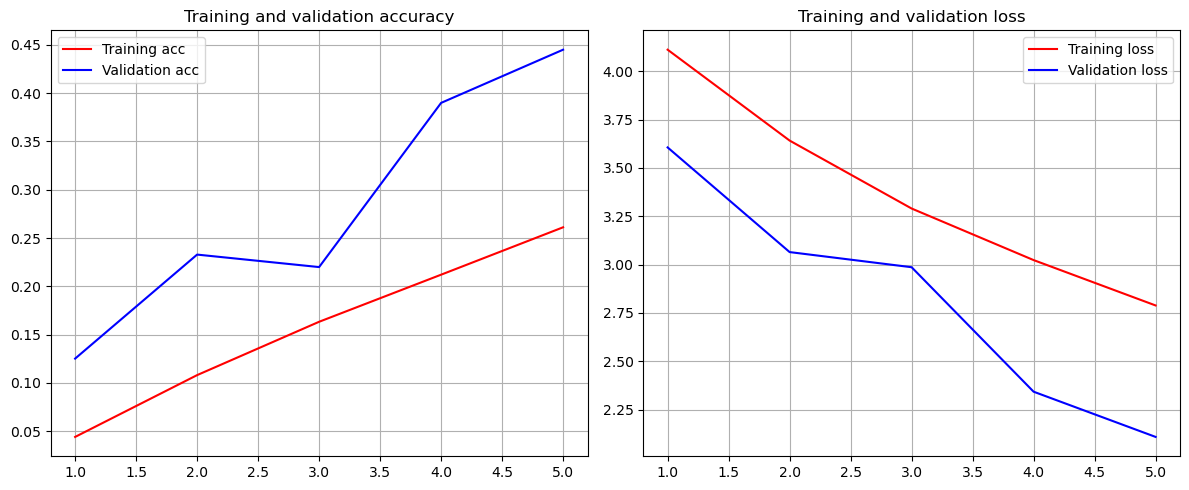

In [21]:
visualize(model1_1)

#### CNN MODEL 1_2

In [22]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(75 , activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 85, 85, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 40, 40, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 38, 38, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 17, 17, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 5, 5, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 75)             │         9,675 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,652,235 (6.30 MB)

 Trainable params: 1,652,235 (6.30 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [24]:
model1_1 = model.fit(
    train_set,
    #epochs=50,
    epochs=5,
    validation_data=validation_set,)

Epoch 1/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1028s 3s/step - accuracy: 0.0159 - loss: 4.2759 - val_accuracy: 0.0532 - val_loss: 3.8535
Epoch 2/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 841s 2s/step - accuracy: 0.0477 - loss: 3.9534 - val_accuracy: 0.0873 - val_loss: 3.5544
Epoch 3/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 985s 2s/step - accuracy: 0.0765 - loss: 3.7214 - val_accuracy: 0.1328 - val_loss: 3.3088
Epoch 4/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1014s 2s/step - accuracy: 0.0998 - loss: 3.4857 - val_accuracy: 0.1682 - val_loss: 3.0505
Epoch 5/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1035s 3s/step - accuracy: 0.1405 - loss: 3.3019 - val_accuracy: 0.2424 - val_loss: 2.7960


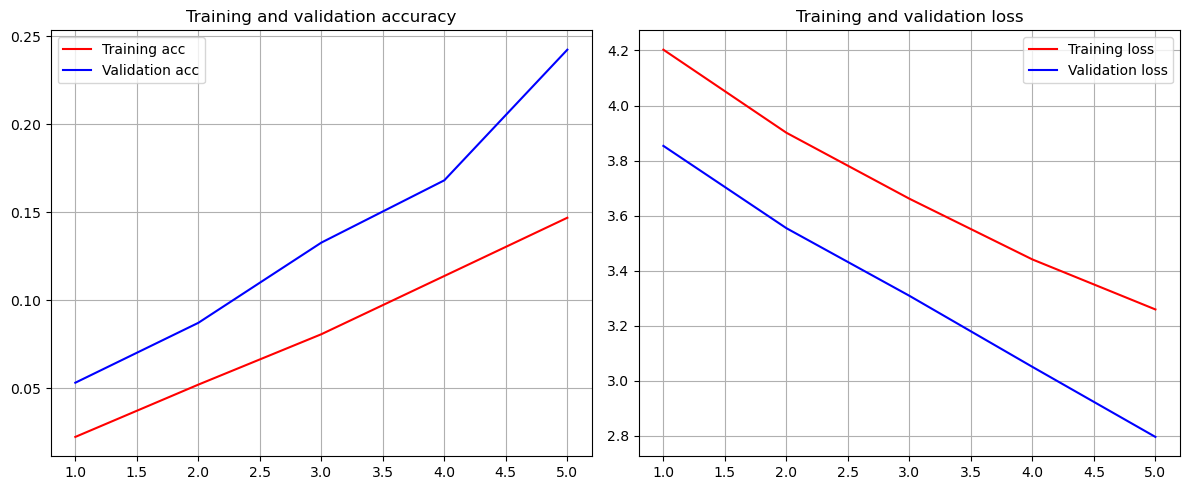

In [25]:
visualize(model1_1)

#### Model 1_4

In [26]:
train_set,validation_set=prep_data(True)

Found 6499 images belonging to 75 classes.
Found 6498 images belonging to 75 classes.


In [27]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(75 , activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 85, 85, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 40, 40, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 38, 38, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 17, 17, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 5, 5, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 75)             │        19,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 940,939 (3.59 MB)

 Trainable params: 940,939 (3.59 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), # 0.0002
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [29]:
model1_3 = model.fit(
    train_set,
    #epochs=100,
    epochs=5,
    validation_data=validation_set,)

Epoch 1/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1097s 3s/step - accuracy: 0.0164 - loss: 4.3076 - val_accuracy: 0.0359 - val_loss: 4.0239
Epoch 2/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1042s 3s/step - accuracy: 0.0467 - loss: 4.0305 - val_accuracy: 0.0562 - val_loss: 3.8162
Epoch 3/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 916s 2s/step - accuracy: 0.0569 - loss: 3.8626 - val_accuracy: 0.0765 - val_loss: 3.7072
Epoch 4/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1019s 3s/step - accuracy: 0.0788 - loss: 3.6787 - val_accuracy: 0.1439 - val_loss: 3.3076
Epoch 5/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 889s 2s/step - accuracy: 0.1035 - loss: 3.5127 - val_accuracy: 0.1761 - val_loss: 3.1500


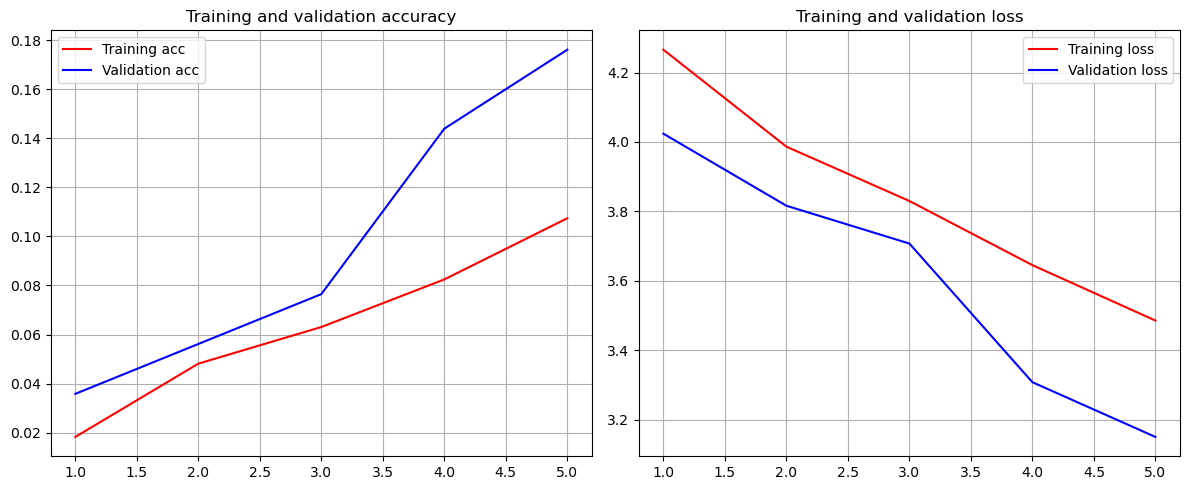

In [30]:
visualize(model1_3)

#### Model 1_5

In [31]:
train_set,validation_set=prep_data(True)

Found 6499 images belonging to 75 classes.
Found 6498 images belonging to 75 classes.


In [32]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(75 , activation='softmax'))

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 85, 85, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 40, 40, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 38, 38, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 17, 17, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 5, 5, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 75)             │        38,475 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,676,811 (10.21 MB)

 Trainable params: 2,676,811 (10.21 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), # 0.0002
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [34]:
model1_5 = model.fit(
    train_set,
    #epochs=120,
    epochs=5,
    validation_data=validation_set,)

Epoch 1/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 961s 2s/step - accuracy: 0.0177 - loss: 4.2910 - val_accuracy: 0.0297 - val_loss: 4.0429
Epoch 2/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1094s 3s/step - accuracy: 0.0338 - loss: 4.0314 - val_accuracy: 0.0653 - val_loss: 3.7435
Epoch 3/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1215s 3s/step - accuracy: 0.0561 - loss: 3.8467 - val_accuracy: 0.1323 - val_loss: 3.3632
Epoch 4/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1207s 3s/step - accuracy: 0.0997 - loss: 3.5560 - val_accuracy: 0.1993 - val_loss: 3.0332
Epoch 5/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1000s 2s/step - accuracy: 0.1274 - loss: 3.3671 - val_accuracy: 0.2399 - val_loss: 2.8142


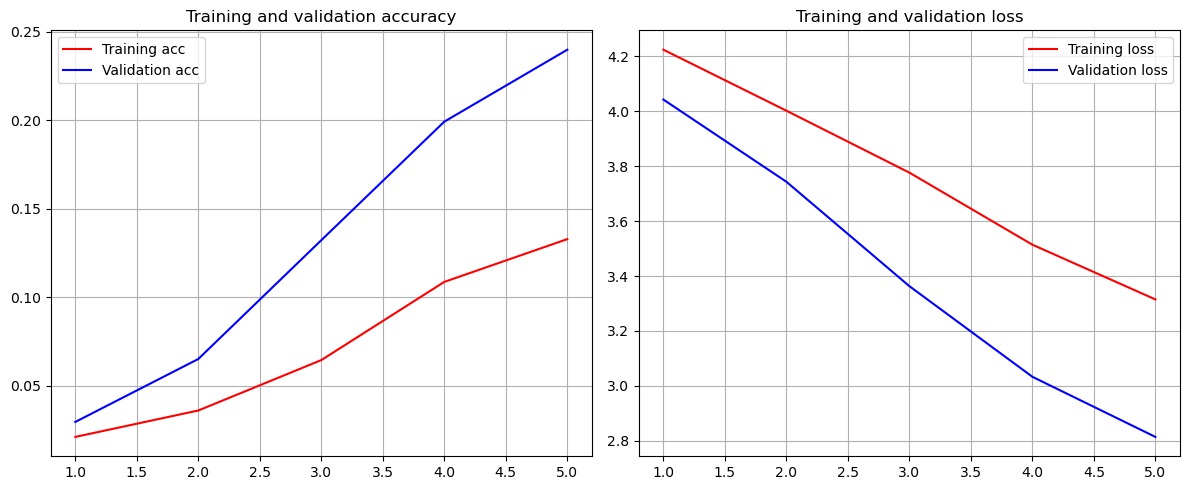

In [35]:
visualize(model1_5)

In [36]:
#### Model 1_6

In [37]:
train_set,validation_set=prep_data(True)

Found 6499 images belonging to 75 classes.
Found 6498 images belonging to 75 classes.


In [38]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.45))
model.add(layers.Dense(75 , activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 85, 85, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 83, 83, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 41, 41, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 39, 39, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 35, 35, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 13, 13, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 75)             │        38,475 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,877,131 (14.79 MB)

 Trainable params: 3,877,131 (14.79 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), # 0.0002
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [40]:
model1_5 = model.fit(
    train_set,
    #epochs=100,
    epochs=5,
    validation_data=validation_set,)

Epoch 1/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1818s 4s/step - accuracy: 0.0144 - loss: 4.3086 - val_accuracy: 0.0376 - val_loss: 4.1059
Epoch 2/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1762s 4s/step - accuracy: 0.0291 - loss: 4.0857 - val_accuracy: 0.0480 - val_loss: 3.8655
Epoch 3/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1537s 4s/step - accuracy: 0.0428 - loss: 3.9635 - val_accuracy: 0.0906 - val_loss: 3.7008
Epoch 4/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1734s 4s/step - accuracy: 0.0645 - loss: 3.8178 - val_accuracy: 0.1310 - val_loss: 3.3272
Epoch 5/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1740s 4s/step - accuracy: 0.0892 - loss: 3.5954 - val_accuracy: 0.1659 - val_loss: 3.2292


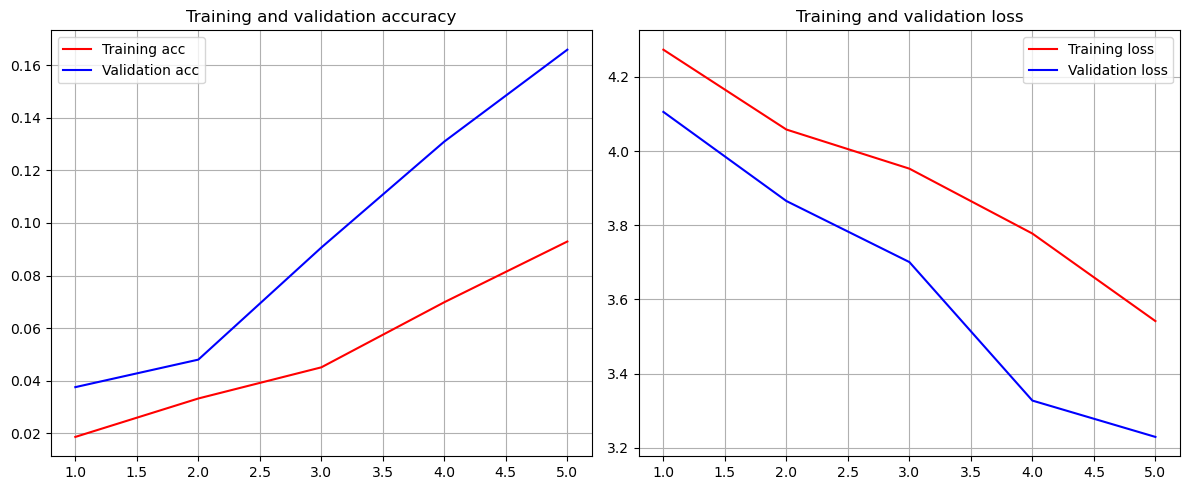

In [41]:
visualize(model1_5)

#### Transfer Learning

In [42]:
# importing pretrained models 
# importing pretrained models 
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception

#### Inception V3 Fine Tuning

In [43]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 6499 images belonging to 75 classes.
Found 6498 images belonging to 75 classes.


In [44]:
base_model = InceptionV3(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 69s 1us/step


In [45]:
# Freeze the layers except the last few layers
for layer in base_model.layers[:-15]:
    layer.trainable = False

In [46]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(75, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005), 
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ ?                      │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 394,880 (1.51 MB)

 Non-trainable params: 21,407,904 (81.66 MB)

In [47]:
fine_tune_inception1_1 = model.fit(
    train_set,
    #epochs=40,
    epochs=5,
    validation_data=validation_set,
    )

Epoch 1/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1107s 3s/step - accuracy: 0.1762 - loss: 3.5763 - val_accuracy: 0.6377 - val_loss: 1.4793
Epoch 2/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1060s 3s/step - accuracy: 0.6179 - loss: 1.4997 - val_accuracy: 0.7599 - val_loss: 0.8916
Epoch 3/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1049s 3s/step - accuracy: 0.7114 - loss: 1.0419 - val_accuracy: 0.8066 - val_loss: 0.6947
Epoch 4/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1140s 3s/step - accuracy: 0.7509 - loss: 0.8631 - val_accuracy: 0.8581 - val_loss: 0.5034
Epoch 5/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1108s 3s/step - accuracy: 0.7963 - loss: 0.6974 - val_accuracy: 0.8740 - val_loss: 0.4482


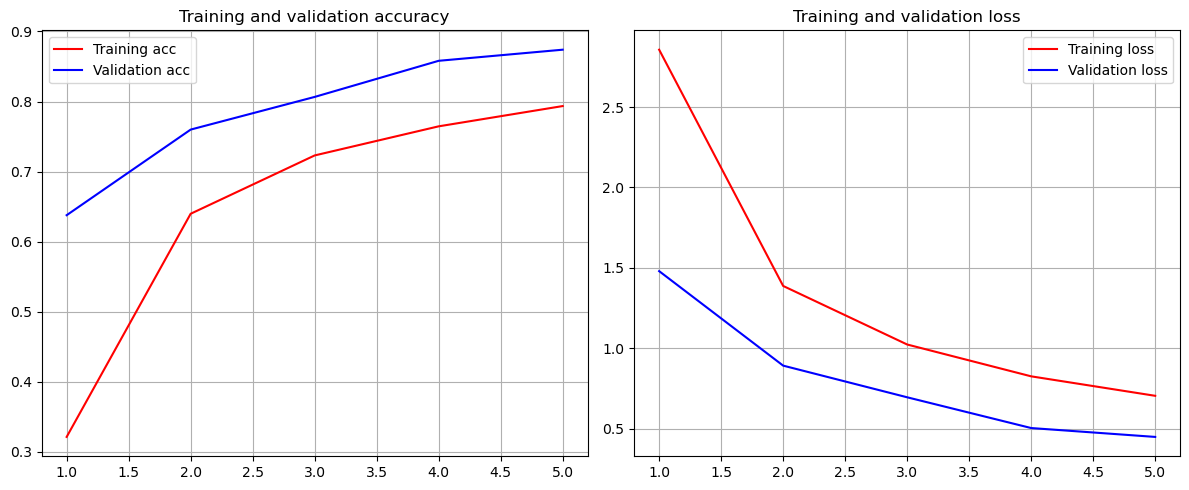

In [48]:
visualize(fine_tune_inception1_1)

#### Inception V3 Fine Tuning 1_2

In [49]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 6499 images belonging to 75 classes.
Found 6498 images belonging to 75 classes.


In [50]:
base_model = InceptionV3(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [51]:
# Freeze the layers except the last few layers
for layer in base_model.layers[:-18]:
    layer.trainable = False

In [52]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(90, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ ?                      │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 1,050,624 (4.01 MB)

 Non-trainable params: 20,752,160 (79.16 MB)

In [53]:
fine_tune_inception1_2 = model.fit(
    train_set,
    #epochs=30,
    epochs=5,
    validation_data=validation_set,
    )

Epoch 1/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1249s 3s/step - accuracy: 0.1078 - loss: 3.9731 - val_accuracy: 0.5899 - val_loss: 1.8409
Epoch 2/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1012s 2s/step - accuracy: 0.4535 - loss: 2.1830 - val_accuracy: 0.7418 - val_loss: 1.0384
Epoch 3/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 886s 2s/step - accuracy: 0.5850 - loss: 1.5315 - val_accuracy: 0.8090 - val_loss: 0.7256
Epoch 4/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1016s 2s/step - accuracy: 0.6722 - loss: 1.2087 - val_accuracy: 0.8475 - val_loss: 0.5594
Epoch 5/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 994s 2s/step - accuracy: 0.7187 - loss: 0.9819 - val_accuracy: 0.8753 - val_loss: 0.4551


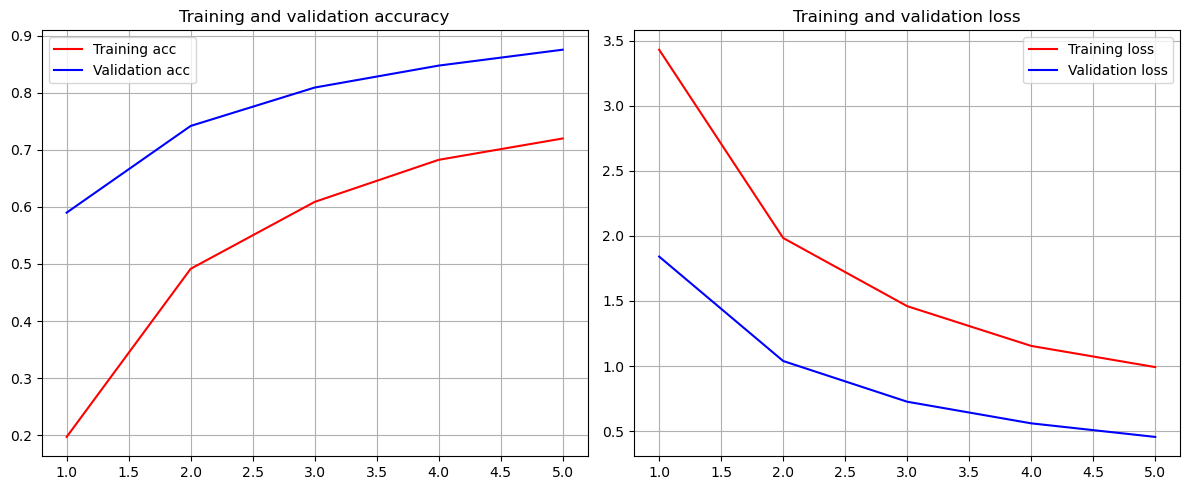

In [54]:
visualize(fine_tune_inception1_2)

#### Accuracy : 71 %
#### Val Accuracy : 87 %